# Markdown Cell
"""
# Philippine Temperature Analysis (2010–Present)

This notebook performs data ingestion, cleaning, merging, and preprocessing of two Philippine temperature datasets.  

**Objectives:**  
1. Load and inspect raw CSV datasets.  
2. Clean missing values and ensure proper data types.  
3. Merge datasets into a unified format.  
4. Save processed data for analysis.  
5. Provide summary statistics and basic visualization.  
"""


# Markdown Cell
"""
## Environment Setup

We will use:
- `pandas` for data manipulation  
- `numpy` for numerical computations  
- `matplotlib` and `seaborn` for optional visualizations  
"""


In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12,6)

# Markdown Cell
"""
## Helper Functions

Reusable functions for:
- Loading CSV files
- Converting datetime
- Filling missing values with monthly averages
- Ensuring numeric types
- Removing duplicates
- Generating summary statistics
"""


In [143]:
def load_csv(path):
    """Load a CSV file into a pandas DataFrame."""
    if not os.path.exists(path):
        raise FileNotFoundError(f"The file at {path} does not exist.")
    df = pd.read_csv(path)
    print(f"Loaded {path}: {df.shape[0]} rows, {df.shape[1]} columns.")
    return df

In [144]:
def convert_datetime(df, column='datetime'):
    """Convert column to datetime format."""
    df[column] = pd.to_datetime(df[column], errors='coerce')
    return df

In [145]:
def fill_missing_with_monthly_avg(df, value_col, group_cols=['city_name']):
    """Fill missing values with monthly averages."""
    df['month'] = df['datetime'].dt.month
    df[value_col] = df.groupby(group_cols + ['month'])[value_col].transform(lambda x: x.fillna(x.mean()))
    df.drop(columns='month', inplace=True)
    return df

In [146]:
def ensure_numeric(df, columns):
    """Convert columns to numeric"""
    for col in columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

In [147]:

def remove_duplicates(df):
    """Drop duplicate rows."""
    return df.drop_duplicates()

In [148]:
def summarize_temperature(df, columns=['temperature_2m_mean', 'temperature_2m_max', 'temperature_2m_min']):
    """Compute summary statistics per city."""
    return df.groupby('city_name')[columns].agg(['mean','min','max','std'])

# Markdown Cell
"""
## Load Dataset 1

Columns include:
`city_name, latitude, longitude, datetime, weather_code, temperature_2m_max, temperature_2m_min, temperature_2m_mean, apparent_temperature_max, apparent_temperature_min`
"""


In [149]:
df1_path = "../data/raw/daily_data_combined_2010_to_2019.csv"
df1 = load_csv(df1_path)
df1 = convert_datetime(df1, 'datetime')

df1.head()
df1.info()

Loaded ../data/raw/daily_data_combined_2010_to_2019.csv: 500324 rows, 24 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500324 entries, 0 to 500323
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   city_name                    500324 non-null  object        
 1   latitude                     500324 non-null  float64       
 2   longitude                    500324 non-null  float64       
 3   datetime                     500324 non-null  datetime64[ns]
 4   weather_code                 500324 non-null  float64       
 5   temperature_2m_max           500324 non-null  float64       
 6   temperature_2m_min           500324 non-null  float64       
 7   temperature_2m_mean          500324 non-null  float64       
 8   apparent_temperature_max     500324 non-null  float64       
 9   apparent_temperature_min     500324 non-null  float64       
 10  apparent_t

# Markdown Cell
"""
## Load Dataset 2

Columns include weather metrics, temperature observations, and city names.  
We will standardize column names to align with Dataset 1.
"""


In [150]:
df2_path = "../data/raw/202412_CombinedData.csv"
df2 = load_csv(df2_path)
df2 = convert_datetime(df2, 'datetime')

df2.head()
df2.info()

Loaded ../data/raw/202412_CombinedData.csv: 51888 rows, 27 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51888 entries, 0 to 51887
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype                    
---  ------                --------------  -----                    
 0   visibility            51787 non-null  float64                  
 1   datetime              51888 non-null  datetime64[ns, UTC+08:00]
 2   coord.lon             51888 non-null  float64                  
 3   coord.lat             51888 non-null  float64                  
 4   main.temp             51888 non-null  float64                  
 5   main.feels_like       51888 non-null  float64                  
 6   main.temp_min         51888 non-null  float64                  
 7   main.temp_max         51888 non-null  float64                  
 8   main.pressure         51888 non-null  float64                  
 9   main.humidity         51888 non-null  float64              

In [151]:
print("Dataset 1 missing values:\n", df1.isnull().sum())
print("\nDataset 2 missing values:\n", df2.isnull().sum())

print("\nDataset 1 duplicates:", df1.duplicated().sum())
print("Dataset 2 duplicates:", df2.duplicated().sum())

Dataset 1 missing values:
 city_name                      0
latitude                       0
longitude                      0
datetime                       0
weather_code                   0
temperature_2m_max             0
temperature_2m_min             0
temperature_2m_mean            0
apparent_temperature_max       0
apparent_temperature_min       0
apparent_temperature_mean      0
sunrise                        0
sunset                         0
daylight_duration              0
sunshine_duration              0
precipitation_sum              0
rain_sum                       0
snowfall_sum                   0
precipitation_hours            0
wind_speed_10m_max             0
wind_gusts_10m_max             0
wind_direction_10m_dominant    0
shortwave_radiation_sum        0
et0_fao_evapotranspiration     0
dtype: int64

Dataset 2 missing values:
 visibility                101
datetime                    0
coord.lon                   0
coord.lat                   0
main.temp           

In [152]:
df1 = fill_missing_with_monthly_avg(df1, 'temperature_2m_mean')

numeric_cols1 = ['temperature_2m_max','temperature_2m_min','temperature_2m_mean',
                 'apparent_temperature_max','apparent_temperature_min']
df1 = ensure_numeric(df1, numeric_cols1)

df1 = remove_duplicates(df1)

In [153]:
df2 = fill_missing_with_monthly_avg(df2, 'main.temp')

numeric_cols2 = ['main.temp','main.temp_max','main.temp_min','main.feels_like','main.pressure','main.humidity']
df2 = ensure_numeric(df2, numeric_cols2)

df2.rename(columns={
    'main.temp':'temperature_2m_mean',
    'main.temp_max':'temperature_2m_max',
    'main.temp_min':'temperature_2m_min',
    'main.feels_like':'apparent_temperature_mean'
}, inplace=True)
df2 = remove_duplicates(df2)



In [154]:
df2['datetime'] = df2['datetime'].dt.tz_localize(None)

common_cols = ['city_name','datetime','temperature_2m_mean','temperature_2m_max','temperature_2m_min']
df_merged = pd.merge(df1, df2[common_cols], on=['city_name','datetime'], how='outer', suffixes=('_ds1','_ds2'))

df_merged['temperature_2m_mean'] = df_merged['temperature_2m_mean_ds1'].combine_first(df_merged['temperature_2m_mean_ds2'])
df_merged['temperature_2m_max'] = df_merged['temperature_2m_max_ds1'].combine_first(df_merged['temperature_2m_max_ds2'])
df_merged['temperature_2m_min'] = df_merged['temperature_2m_min_ds1'].combine_first(df_merged['temperature_2m_min_ds2'])

df_final = df_merged[['city_name','datetime','temperature_2m_mean','temperature_2m_max','temperature_2m_min',
                      'apparent_temperature_max','apparent_temperature_min'] if 'apparent_temperature_max' in df1.columns else ['city_name','datetime','temperature_2m_mean','temperature_2m_max','temperature_2m_min']]
df_final = df_final.sort_values(['city_name','datetime']).reset_index(drop=True)


In [155]:
output_path = "../data/processed/phil_temp_2010_2024.csv"
os.makedirs(os.path.dirname(output_path), exist_ok=True)
df_final.to_csv(output_path, index=False)
print(f"Processed dataset saved to {output_path}")
df_final.head()

Processed dataset saved to ../data/processed/phil_temp_2010_2024.csv


,city_name,datetime,temperature_2m_mean,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min
0,Alaminos,2010-01-01,26.6,29.9,24.8,32.0,26.5
1,Alaminos,2010-01-02,26.7,29.4,25.0,32.1,27.4
2,Alaminos,2010-01-03,26.0,27.6,24.5,30.9,28.6
3,Alaminos,2010-01-04,25.9,28.8,23.1,33.6,27.5
4,Alaminos,2010-01-05,26.4,28.5,24.5,33.7,28.8


In [156]:
summary = summarize_temperature(df_final)
summary

temperature_2m_mean                         temperature_2m_max  \
                              mean    min    max       std               mean   
city_name                                                                       
Alaminos                 27.327828  23.30  31.20  1.228403          29.744958   
Angeles City             26.382490  21.20  32.25  1.690266          30.020499   
Antipolo                 25.942073  20.72  32.37  1.705752          29.556919   
Bacolod                  26.998491  22.66  30.54  1.144590          28.846306   
Bacoor                   27.804960  22.40  32.50  1.493203          30.603304   
...                            ...    ...    ...       ...                ...   
Valencia                 25.573518  22.50  32.35  1.108408          27.558324   
Valenzuela               26.946187  21.70  32.92  1.489708          29.777363   
Victorias                27.612783  22.70  31.30  1.160833          30.179566   
Vigan                    27.076946  22.10  32.18  1.303407          29.087969   
Zamboanga City           27.174017  23.36  32.99  0.889009          28.789856   

                                       temperature_2m_min               \
                  min    max       std               mean   min    max   
city_name                                                                
Alaminos        24.40  37.60  2.053544          25.564968  20.2  30.78   
Angeles City    22.25  37.70  2.400378          23.523652  15.8  32.25   
Antipolo        20.72  37.80  2.680673          23.244233  15.8  32.37   
Bacolod         22.66  34.00  1.685025          25.564826  20.3  30.54   
Bacoor          23.70  37.10  2.199289          25.668779  19.8  31.73   
...               ...    ...       ...                ...   ...    ...   
Valencia        22.66  32.35  1.450617          24.010161  20.0  32.35   
Valenzuela      23.10  36.50  2.120261          24.811589  17.9  31.72   
Victorias       24.23  36.10  2.066556          25.560722  19.8  30.13   
Vigan           22.95  33.70  1.576330          25.306688  19.9  32.18   
Zamboanga City  23.36  32.99  1.183292          25.745740  22.2  32.99   

                          
                     std  
city_name                 
Alaminos        1.348247  
Angeles City    2.149501  
Antipolo        1.799068  
Bacolod         1.023892  
Bacoor          1.328699  
...                  ...  
Valencia        1.158485  
Valenzuela      1.547186  
Victorias       0.942964  
Vigan           1.563505  
Zamboanga City  0.987057  

[138 rows x 12 columns]

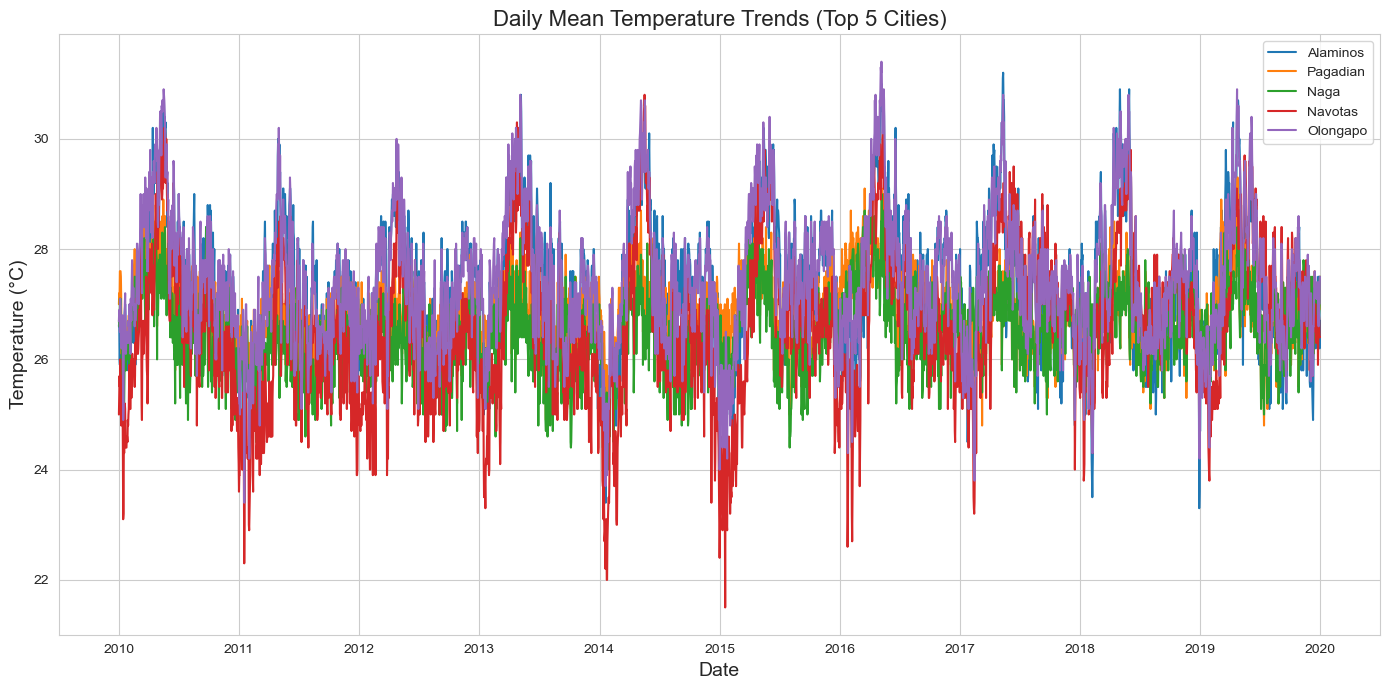

In [157]:
# Plot temperature trends for top 5 cities with continuous time series
top_cities = df_final['city_name'].value_counts().index[:5]

plt.figure(figsize=(14,7))

for city in top_cities:
    city_data = df_final[df_final['city_name'] == city].copy()
    
    # Create a complete date range for this city
    full_date_range = pd.date_range(start=city_data['datetime'].min(), end=city_data['datetime'].max())
    city_data = city_data.set_index('datetime').reindex(full_date_range)
    
    # Rename the index back to datetime for plotting
    city_data.index.name = 'datetime'
    
    # Plot, skipping NaN automatically
    plt.plot(city_data.index, city_data['temperature_2m_mean'], label=city)

plt.title("Daily Mean Temperature Trends (Top 5 Cities)", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Temperature (°C)", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()
